This notebook will be dedicated to determining which variables are most important in determining the MVP. To do this I will use random forest's built in variable importance metric that utilizes OoB variable importance.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

#Read in data
df = pd.read_csv('finalFeatures.csv')

In [2]:
df.head(5)

,Unnamed: 0,FTA,W%,BLK,MP,PTS,DRB,FGA,STL,FG%,...,2PA,2P,2P%,Age,PF,eFG%,3P%,AST,Year,Share
0,0,3.6,0.79268,1.0,28.4,10.8,5.1,7.4,0.9,0.538,...,7.4,4.0,0.543,23,True,0.538,0.000,1.1,1987,0.0
1,1,1.7,0.79268,0.1,6.8,4.3,0.9,3.0,0.5,0.500,...,2.9,1.5,0.511,23,False,0.500,0.000,0.5,1987,0.0
2,2,1.3,0.79268,0.5,12.9,5.6,1.7,4.4,0.3,0.544,...,4.4,2.4,0.546,23,False,0.544,0.000,1.0,1987,0.0
3,3,3.1,0.79268,0.2,33.3,17.0,2.7,13.8,1.5,0.489,...,12.0,6.0,0.496,25,False,0.517,0.436,3.4,1987,0.0
4,4,4.7,0.79268,1.0,34.4,19.4,3.8,14.7,1.3,0.539,...,14.6,7.9,0.545,25,False,0.539,0.000,2.8,1987,0.0


In [3]:
#Remove extre column
del df['Unnamed: 0']

In [4]:
df.head(5)

,FTA,W%,BLK,MP,PTS,DRB,FGA,STL,FG%,TRB,...,2PA,2P,2P%,Age,PF,eFG%,3P%,AST,Year,Share
0,3.6,0.79268,1.0,28.4,10.8,5.1,7.4,0.9,0.538,7.8,...,7.4,4.0,0.543,23,True,0.538,0.000,1.1,1987,0.0
1,1.7,0.79268,0.1,6.8,4.3,0.9,3.0,0.5,0.500,1.7,...,2.9,1.5,0.511,23,False,0.500,0.000,0.5,1987,0.0
2,1.3,0.79268,0.5,12.9,5.6,1.7,4.4,0.3,0.544,2.9,...,4.4,2.4,0.546,23,False,0.544,0.000,1.0,1987,0.0
3,3.1,0.79268,0.2,33.3,17.0,2.7,13.8,1.5,0.489,3.5,...,12.0,6.0,0.496,25,False,0.517,0.436,3.4,1987,0.0
4,4.7,0.79268,1.0,34.4,19.4,3.8,14.7,1.3,0.539,5.7,...,14.6,7.9,0.545,25,False,0.539,0.000,2.8,1987,0.0


In [5]:
features = ['FTA', 'W%', 'BLK', 'MP', 'PTS', 'DRB', 'FGA', 'STL', 'FG%', 'TRB', 'TOV', 'PG', 'FT%',
           'G', 'C', 'ORB', '2PA', '2P', '2P%', 'Age', 'PF', 'eFG%', '3P%', 'AST']

# Random Forest Variable Importance

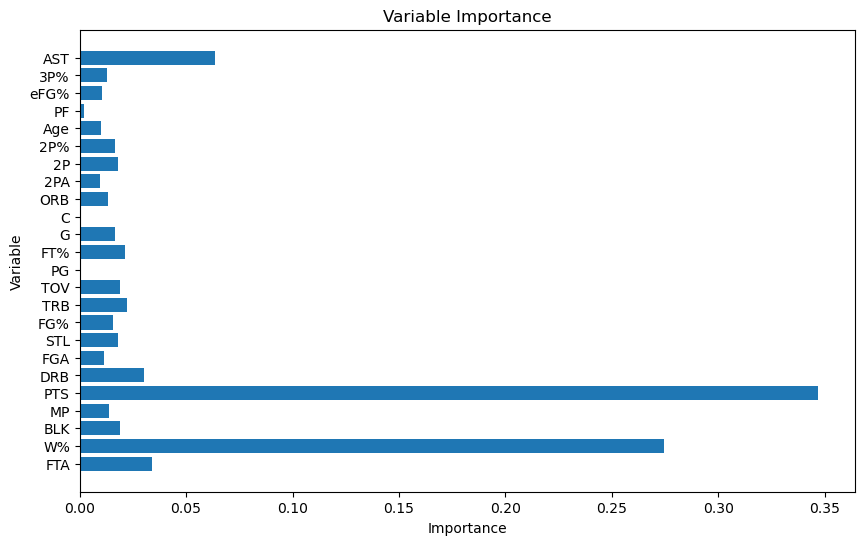

In [6]:
#Format data
X = df[features]
y = df['Share']

#Instantiate model
rf = RandomForestRegressor(max_features = 24, n_estimators = 500)

#Fit model
rf.fit(X,y)

#Variable importance
importance = rf.feature_importances_

#Graph results
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importance, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Variable Importance')
plt.show()

The two most important predictors by far appear to be the number of points per game a player has and the teams win percentage. This backs up the claim that team success is a factor in determining the MVP. Based on these results it would be expected that players who score a lot per game and are on winning teams would be favorites to win the MVP. It is also important to note that the variables that represents a players position seem to be the least signigicant. So the positon of a player does not seem to be very important predictor. This is different from the NFL where many people claims the MVP has just become the best quarterback in the league award.